# **Lab 5: differential equations**
**Jesper Lidbaum**

# **Abstract**

In this report, we present explicit Euler for single initial value problems(IVP) and systems of IVPs. We analyze the method on two problems and check them against the exact solution.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [131]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Jesper Lidbaum (jlidbaum@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need 
additional modules, this is where you add them. 

In [132]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

#try:
#    from dolfin import *; from mshr import *
#except ImportError as e:
#    !apt-get install -y -qq software-properties-common 
#    !add-apt-repository -y ppa:fenics-packages/fenics
#    !apt-get update -qq
#    !apt install -y --no-install-recommends fenics
#    from dolfin import *; from mshr import *
    
#import dolfin.common.plotting as fenicsplot

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D
import random

# **Introduction**

## Initial value problems
Initial value problems(IVP) are problems that include a differential equation and a set of initial conditions, for example, $y' = -5y$ with $y(0) = 10$. Since many differential equations can not be solved directly we need to solve them numerically for which there are many different methods.

## System of initial value problems
We may also have a system of equations with more initial conditions. For example
$$  \begin{bmatrix}
        \dot{u_1}(t) \\
        \dot{u_2}(t) \\
    \end{bmatrix} =
    \begin{bmatrix}
        u_2(t) \\
        -u_1(t) \\
    \end{bmatrix}
$$
with $u_1(0) = 0$ and $u_2(0) = 1$ which corresponds to some harmonic oscialtor. 

## Solver
For the solver, I choose to implement explicit Euler which is simple but has some issues with stability. In the results, we test the solver against the model problem 
$$\dot{u}(t) = \lambda u(t) \text{, } u(0)=1$$
and we also test a harmonic oscillator for the system of initial value problems.
$$  \begin{bmatrix}
        \dot{u_1}(t) \\
        \dot{u_2}(t) \\
    \end{bmatrix} =
    \begin{bmatrix}
        u_2(t) \\
        \frac{-k}{m}u_1(t) \\
    \end{bmatrix}
$$

# **Method**
Here we present code for explicit Euler, both for single IVPs and system of IVPs

## Explicit Euler for single IVP
We input an initial value condition, a function that is the first order derivative expressed with $\dot{u}(t) = f(u,t)$, a stopping time, and a step size. We return the value of $u_0$ at time $T$.

In [133]:
def explicit_euler(f, t0, u0, T, h):
  while(t0 < T):
    u0 = u0 + h*f(u0,t0)
    t0 = t0 + h
  return u0


## Explicit Euler for systems of IVPs
This function is very similar to the last but we let $f$ be a vector function and $u0$ a vector of initial values. Because NumPy can overload the math operators the code will be the same.

In [134]:
def explicit_euler_system(f, t0, u0, T, h):
  while(t0 < T):
    u0 = u0 + h*f(u0,t0)
    t0 = t0 + h
  return u0

# **Results**
In this part, we present the results from the tests of the different methods.


In [135]:
tests = 2

## Explicit Euler for single IVP
Here we test Explicit Euler for single IVP we use the model problem and test the stability. The method should be stable for real values $-2 < h\lambda < 0$ so we test values in that range. We can see that for the tests the results converge to zero which means that the method is A stable for the condition. For the error as lambda gets large we can see that the error is larger in the begining but converges to zero. 

Running with lambda = -1251.6543882248718
Running with lambda = -522.3421528112931


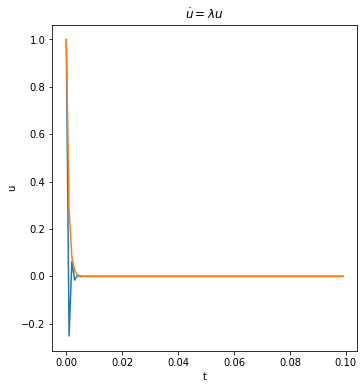

<Figure size 432x288 with 0 Axes>

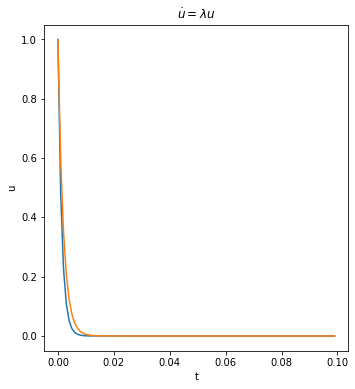

In [136]:
h = 0.001
lambda_high = 0.0
lambda_low = -2.0 / h

def test_explicit_euler(T):
  lambda_value = random.uniform(lambda_low, lambda_high)
  print("Running with lambda = " + str(lambda_value))
  f = lambda u0, t : lambda_value * u0
  values = np.zeros(int(T / h))
  for i in range(0,int(T / h)):
    values[i] = explicit_euler(f, 0.0, 1.0, i * h, h)
  real_values = np.exp(np.arange( 0.0, T, h) * lambda_value)
  return values, real_values

for _ in range(tests):
  values, real_values = test_explicit_euler(0.1)
  t = np.arange( 0.0, 0.1, h)

  plt.figure(2)
  plt.figure(figsize=(12,6))

  plt.subplot(121)

  plt.plot(t,values, t, real_values)

  # Set plot labels and title for the subplot
  plt.xlabel('t')
  plt.ylabel('u')
  plt.title('$\dot{u} = \lambda u$')

## Explicit Euler for system of IVPs
For this method, we test a harmonic oscillator and plot it against the exact solution. We can see that the error and also the energy in the system increases in each period. This corresponds with chapter 14.4 in the course book. 

Running with k = 1, and m = 1


Text(0, 0.5, 'v')

<Figure size 432x288 with 0 Axes>

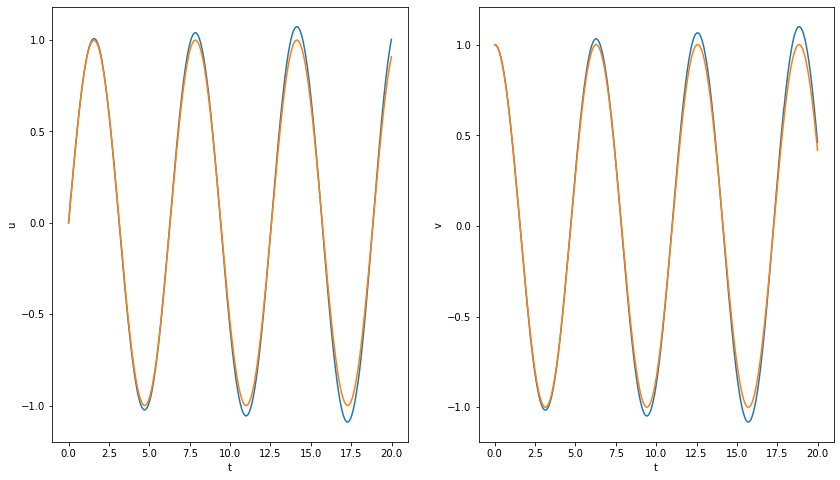

In [137]:
h = 0.01

def test_explicit_euler_system(T):
  k = 1
  m = 1
  f = lambda u0, t : np.array([u0[1], -k/m * u0[0]])
  print("Running with k = " + str(k) + ", and m = " + str(m))
  u = np.zeros(int(T / h))
  v = np.zeros(int(T / h))
  for i in range(0,int(T / h)):
    value = explicit_euler_system(f, 0.0, np.array([0, 1]), i * h, h)
    u[i] = value[0]
    v[i] = value[1]
  real_u = np.sin(np.arange( 0.0, T, h))
  real_v = np.cos(np.arange( 0.0, T, h))
  return u, v, real_u, real_v

u, v, real_u, real_v = test_explicit_euler_system(20)
t = np.arange( 0.0, 20, h)

plt.figure(2)
plt.figure(figsize=(14, 8))

plt.subplot(121)
plt.plot(t, u, t, real_u)

# Set plot labels and title for the subplot
plt.xlabel('t')
plt.ylabel('u')

plt.subplot(122)
plt.plot(t, v, t, real_v)

# Set plot labels and title for the subplot
plt.xlabel('t')
plt.ylabel('v')

# **Discussion**

We saw that explicit Euler worked for the IVP with a single value in the sense that it converged right. However, the error was large in some ranges when lambda was large. For the system of IVP, we saw that the amplitude increased and also the error as time went on.

Explicit Euler is a very simple method to implement however as we saw there are some issues with energy conservation. But because of its simplicity, it could be useful for certain problems if you analyze the problem first and find for which conditions it is stable.